SHIDQI AHMAD MUSYAFFA'_5142535_2IA01

#TUGAS

## Instruksi Praktikum

1. Silahkan modifikasi kode operasi yang ada menggunakan library perhitungan berbasis GPU (Library Cupy)
2. Bacalah dataset yang berada tersimpan url https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv
3. Periksa dataset apakah terdapat data yang bernilai null dengan menggunakan fungsi .isnull()
4. Buatlah sebuah histogram dari data kolom 'strength'.
5. Buatlah diagram boxplot dari dataset yang ada.
6. Hitung karakteristik statistik (standar deviasi, variance, mean, median) dari masing-masing kolom data.
7. Buatlah correlation map dari dataset tersebut.
8. Hitung covariance dari kolom data yang diminta
9. Hitung pearson correlation dan spearsman correlation dari kolom data yang diminta
10. Hitung nilai hipotesis testing untuk kolom age dan strength.

1. Silahkan modifikasi kode operasi yang ada menggunakan library perhitungan berbasis GPU (Library Cupy)

In [ ]:
# BERFUNGSI IMPORT LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats


PENJELASAN CODE

import pandas as pd: Ini mengimpor pustaka Pandas dengan alias pd. Pandas digunakan untuk manipulasi dan analisis data dalam bentuk DataFrame.

import numpy as np: Ini mengimpor pustaka NumPy dengan alias np. NumPy digunakan untuk operasi matematika dan manipulasi array numerik.

import seaborn as sns: Ini mengimpor pustaka Seaborn dengan alias sns. Seaborn adalah pustaka yang memudahkan visualisasi data dan bekerja dengan Pandas DataFrames.

import matplotlib.pyplot as plt: Ini mengimpor pustaka Matplotlib dengan alias plt. Matplotlib digunakan untuk membuat berbagai jenis visualisasi data, seperti grafik dan plot.

from pandas.plotting import autocorrelation_plot: Ini mengimpor modul autocorrelation_plot dari pustaka Pandas. Ini digunakan untuk membuat plot autocorrelation (plot ACF) dari data deret waktu.

from scipy import stats: Ini mengimpor modul stats dari pustaka SciPy. SciPy adalah pustaka yang digunakan untuk berbagai tugas ilmiah, termasuk statistik dan analisis data.

plt.style.use("ggplot"): Ini mengatur gaya visualisasi Matplotlib ke gaya "ggplot", yang merupakan salah satu gaya yang sudah tersedia untuk plot.

import warnings: Ini mengimpor pustaka warnings, yang digunakan untuk mengelola peringatan (warnings) dalam Python.

warnings.filterwarnings("ignore"): Ini mengonfigurasi Python untuk mengabaikan peringatan yang mungkin muncul selama eksekusi kode. Ini berguna untuk menghindari tampilan peringatan yang mungkin mengganggu.

2. Bacalah dataset yang berada tersimpan url https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv

In [ ]:
# MEMBACA DATA DARI LINK
url_data = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv"
data = pd.read_csv(url_data)

In [ ]:
# MENAMPILKAN OUTPUT 5 BARIS AWAL
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


penjelasan code

url_data = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv": Baris ini mendefinisikan variabel url_data yang berisi URL tempat data CSV dapat diunduh. Dalam hal ini, data CSV tersebut disimpan di repositori GitHub dengan URL tertentu.

data = pd.read_csv(url_data): Ini adalah perintah yang menggunakan Pandas (pd) untuk membaca data dari URL yang telah ditentukan dan menyimpannya dalam variabel data dalam bentuk DataFrame. Fungsi read_csv() digunakan untuk membaca data dari file CSV, baik yang berada di sistem file lokal maupun yang dapat diunduh melalui URL.

Setelah eksekusi kode ini, Anda akan memiliki data dari file CSV yang diunduh dari URL tersimpan dalam variabel data, dan Anda dapat melakukan berbagai operasi analisis data pada DataFrame ini menggunakan Pandas.

data: Ini adalah nama variabel yang berisi Pandas DataFrame yang telah dibaca sebelumnya dari file CSV atau sumber data lainnya.

.head(): Ini adalah metode Pandas yang digunakan untuk menampilkan sejumlah baris pertama dari DataFrame. Secara default, metode head() akan menampilkan lima baris pertama dari DataFrame jika tidak ada argumen yang diberikan.

Jadi, ketika menjalankan data.head(), akan melihat output berupa lima baris pertama dari data yang ada di DataFrame. Ini berguna untuk mendapatkan gambaran awal tentang struktur dan isi data . data itu dapat mengganti angka di dalam head() jika ingin menampilkan jumlah baris yang berbeda. Misalnya, data.head(10) akan menampilkan sepuluh baris pertama data.

3. Periksa dataset apakah terdapat data yang bernilai null dengan menggunakan fungsi .isnull()

In [ ]:
# MENAMPILKAN DIMENSI DATASET
print('Shape dataset', data.shape)

# MENAMPILKAN KOLOM DATASET
print(data.columns)



Shape dataset (1030, 9)
Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


In [ ]:
# MENAMPILKAN DATASET APAKAH BERNILAI NULL DENGAN MENGUNAKAN FUNGSI .ISNNULL()
print("mean stength :",data['strength'].isnull())

mean stength : 0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Name: strength, Length: 1030, dtype: bool


penjelasan code

print('Shape dataset', data.shape): Ini adalah perintah yang digunakan untuk mencetak (print) informasi tentang dimensi dataset. data.shape adalah atribut Pandas DataFrame yang memberikan informasi tentang jumlah baris dan kolom dalam DataFrame. Ketika menjalankan perintah ini,  akan melihat output berupa pesan teks yang mencantumkan "Shape dataset" diikuti oleh tupel yang berisi dua angka, yang mewakili jumlah baris dan kolom dalam dataset.

print(data.columns): Ini adalah perintah yang digunakan untuk mencetak (print) daftar nama kolom-kolom dalam dataset. data.columns adalah atribut yang memberikan daftar nama kolom dalam DataFrame. Ketika  menjalankan perintah ini, akan melihat output berupa daftar nama-nama kolom dalam dataset.

data['strength']: Ini adalah cara mengakses kolom 'strength' dalam DataFrame data. mengambil kolom 'strength' dari DataFrame untuk memeriksa apakah setiap entri dalam kolom ini memiliki nilai null.

.isnull(): Ini adalah metode Pandas yang digunakan untuk memeriksa apakah setiap entri dalam kolom (atau seluruh DataFrame) adalah null atau tidak. Ketika menjalankan .isnull() pada kolom 'strength',  akan mendapatkan rangkaian hasil yang berisi True atau False. True menunjukkan bahwa nilai pada entri tersebut adalah null, sementara False menunjukkan bahwa entri tersebut memiliki nilai.

print("mean stength :", data['strength'].isnull()): Ini adalah perintah yang mencetak (print) hasil dari .isnull() untuk kolom 'strength'. Pesan "mean stength :" dicetak bersama dengan rangkaian True dan False yang menunjukkan keberadaan nilai null dalam kolom 'strength'.

##4.Buatlah sebuah histogram dari data kolom 'strength'.

(array([0.00217712, 0.00399138, 0.01015989, 0.01269986, 0.02104548,
        0.01451412, 0.01088559, 0.01814265, 0.02757683, 0.01596553,
        0.01995692, 0.02975395, 0.01814265, 0.03047966, 0.02249689,
        0.01850551, 0.012337  , 0.00979703, 0.01451412, 0.01269986,
        0.00907133, 0.00798277, 0.00507994, 0.00580565, 0.00580565,
        0.00362853, 0.00362853, 0.00181427, 0.00362853, 0.00145141]),
 array([ 2.33      ,  5.00566667,  7.68133333, 10.357     , 13.03266667,
        15.70833333, 18.384     , 21.05966667, 23.73533333, 26.411     ,
        29.08666667, 31.76233333, 34.438     , 37.11366667, 39.78933333,
        42.465     , 45.14066667, 47.81633333, 50.492     , 53.16766667,
        55.84333333, 58.519     , 61.19466667, 63.87033333, 66.546     ,
        69.22166667, 71.89733333, 74.573     , 77.24866667, 79.92433333,
        82.6       ]),
 <BarContainer object of 30 artists>)

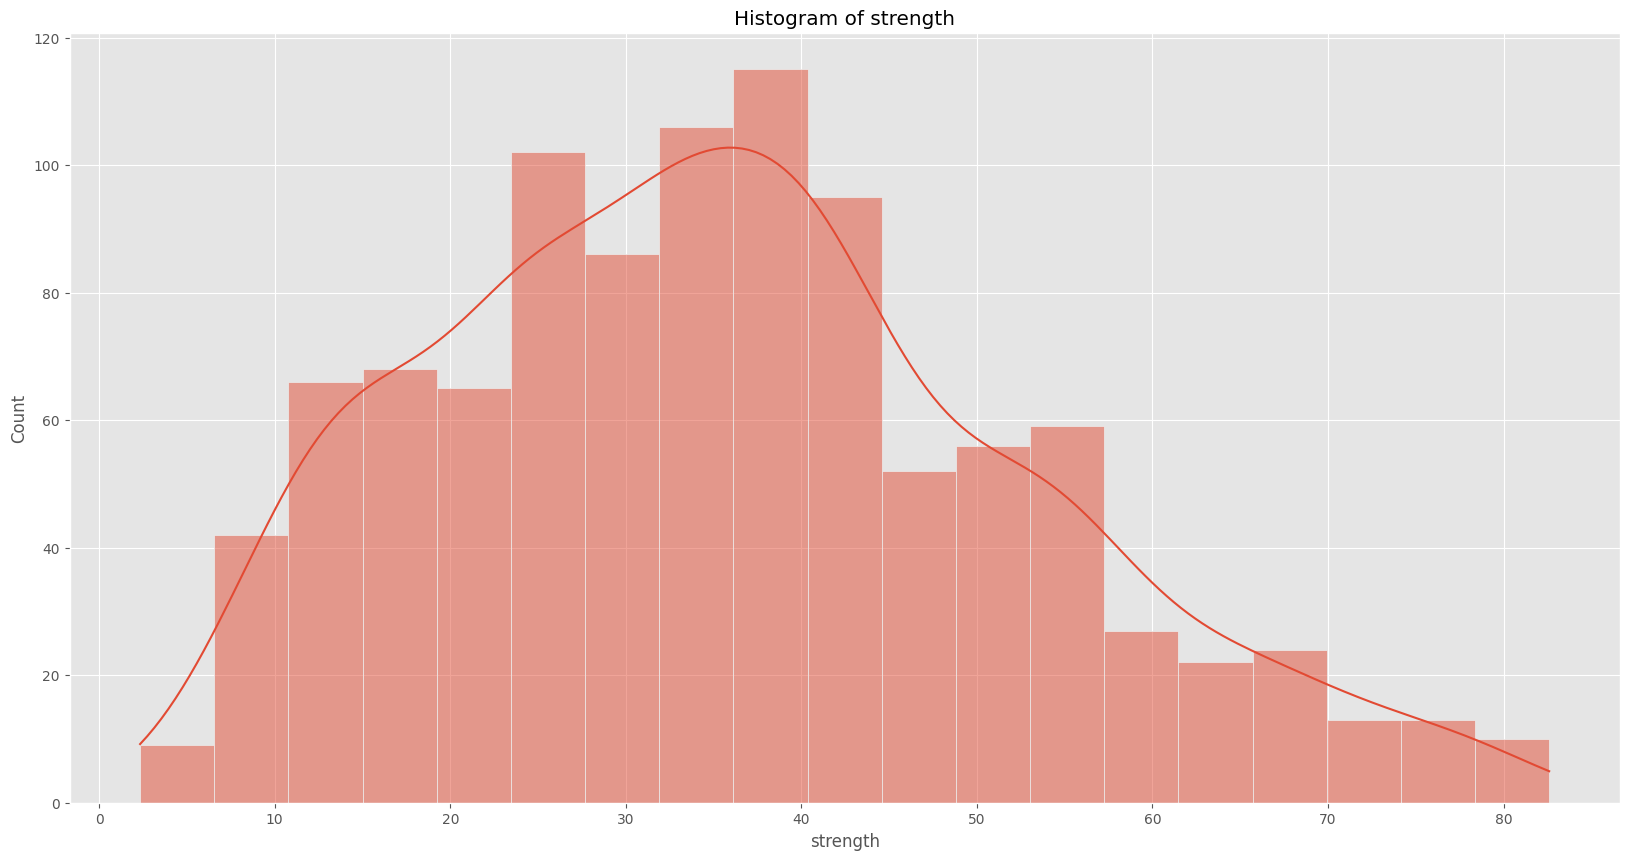

In [ ]:
## HISTOGRAM DATA KOLOM STRENGTH
plt.figure(figsize=(20,10))
plt.title('Histogram of strength')
sns.histplot(data,x='strength',kde=True)
plt.hist(data['strength'], density=True, bins=30, label="Data")

penjelasan code

plt.figure(figsize=(20, 10)): Ini adalah perintah untuk membuat gambar (figure) Matplotlib dengan ukuran (figsize) lebar 20 dan tinggi 10. Gambar ini akan digunakan sebagai wadah untuk plot histogram.

plt.title('Histogram of strength'): Ini adalah perintah untuk menambahkan judul (title) ke plot histogram yang akan dibuat. Judulnya adalah "Histogram of strength".

sns.histplot(data, x='strength', kde=True): Ini adalah perintah yang menggunakan Seaborn (sns) untuk membuat plot histogram dari data dalam kolom 'strength'. Dengan parameter x='strength',  menentukan bahwa kolom 'strength' akan digunakan sebagai data yang akan diplot. Parameter kde=True menambahkan perkiraan plot kerapatan (Kernel Density Estimation) di atas histogram. Seaborn akan menciptakan plot histogram bersama dengan kurva estimasi kepadatan di atasnya.

plt.hist(data['strength'], density=True, bins=30, label="Data"): Ini adalah perintah untuk membuat histogram dengan Matplotlib. Ini merupakan redundansi dalam kode, karena Anda sebelumnya telah menggunakan Seaborn untuk membuat histogram. Namun, jika ingin menambahkan histogram Matplotlib secara terpisah, perintah ini akan membuat histogram dari data dalam kolom 'strength' dengan parameter berikut:

density=True: Parameter ini mengubah frekuensi menjadi densitas, sehingga area di bawah histogram sama dengan 1.
bins=30: Ini menentukan jumlah batang (bins) yang akan digunakan dalam histogram. Di sini, ada 30 batang.
label="Data": Ini adalah label yang diberikan pada histogram.

5. Buatlah diagram boxplot dari dataset yang ada.

strength    26.099
dtype: float64


<Figure size 1500x1000 with 0 Axes>

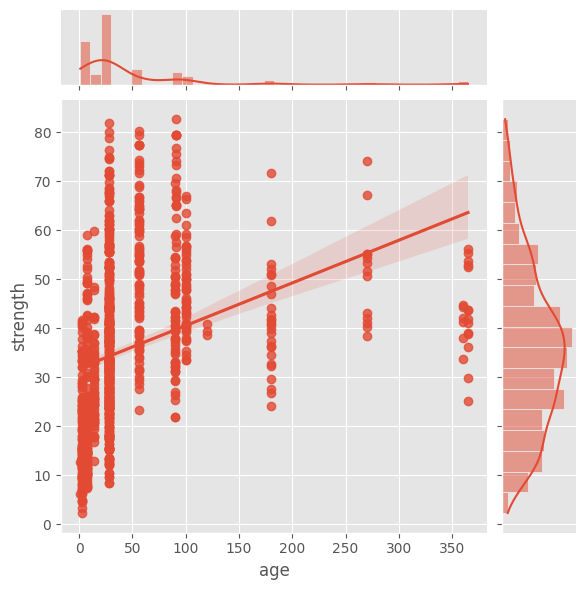

In [ ]:
# HISTOGRAM STREGH
q1 = data[["strength"]].quantile(0.35)
q2 = data[["strength"]].quantile(0.85)
iqr = q2 -q1
print(iqr)

# Membuat figure
plt.figure(figsize = (15,10))

# Membuat jointplot
sns.jointplot(x='age', y='strength', data=data, kind="reg")

# Menampilkan plot
plt.show()

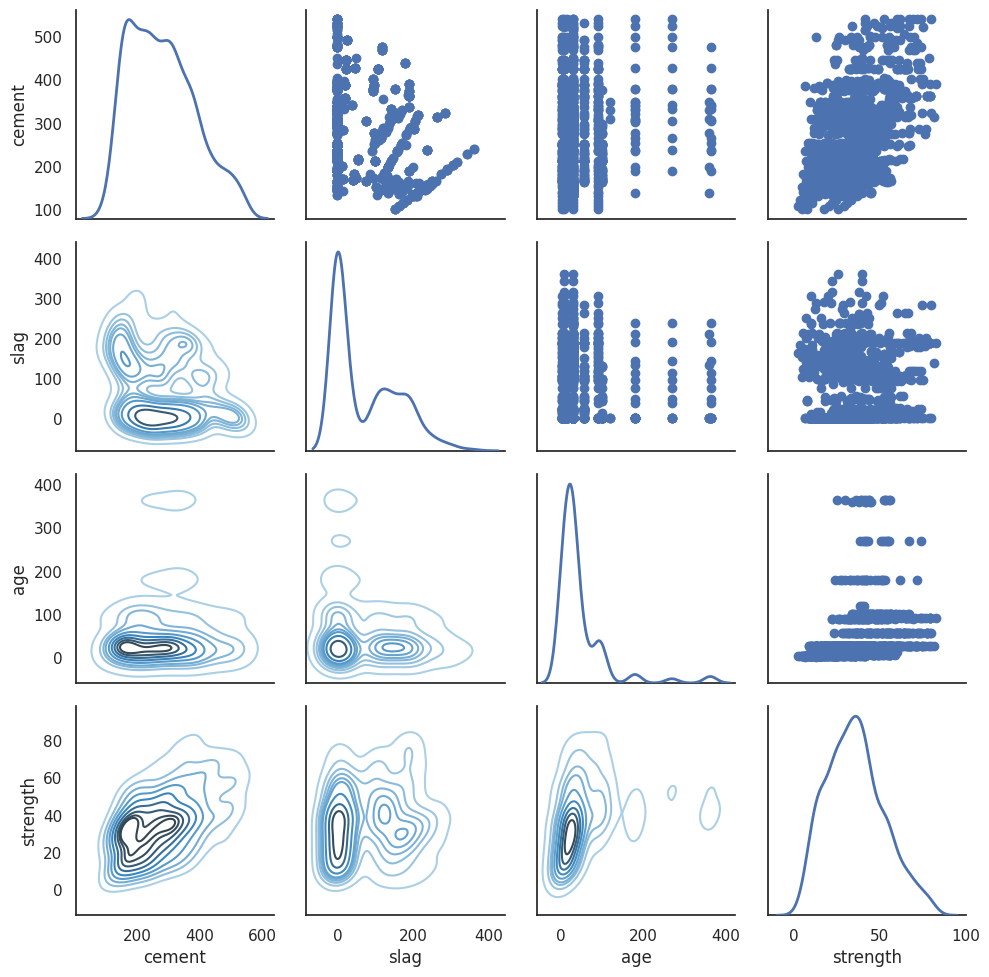

In [ ]:
# HUBUNGAN ANTAR DATA 'cement', 'slag', 'age', dan 'strengh'
sns.set(style = "white")
df = data.loc[:,["cement","slag","age","strength"]]
g = sns.PairGrid(df,diag_sharey = False)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw = 2)
plt.show()

penjelasan code

q1 = data[["strength"]].quantile(0.35): Baris ini menghitung kuartil pertama (Q1) dari kolom 'strength' dalam DataFrame data. Kuartil pertama (Q1) adalah nilai di mana 35% dari data berada di bawahnya. Hasilnya disimpan dalam variabel q1.

q2 = data[["strength"]].quantile(0.85): Baris ini menghitung kuartil ketiga (Q3) dari kolom 'strength' dalam DataFrame data. Kuartil ketiga (Q3) adalah nilai di mana 85% dari data berada di bawahnya. Hasilnya disimpan dalam variabel q2.

iqr = q2 - q1: Baris ini menghitung Rentang Interkuartil (IQR), yang merupakan selisih antara kuartil ketiga (Q3) dan kuartil pertama (Q1). IQR adalah ukuran sebaran data di antara kuartil 1 dan 3. Hasilnya disimpan dalam variabel iqr.

plt.figure(figsize=(15, 10)): Ini adalah perintah untuk membuat gambar (figure) Matplotlib dengan ukuran (figsize) lebar 15 dan tinggi 10. Gambar ini akan digunakan sebagai wadah untuk plot berikutnya.

sns.jointplot(x='age', y='strength', data=data, kind="reg"): Ini adalah perintah untuk membuat plot joint (joint plot) menggunakan Seaborn. Plot joint menampilkan hubungan antara dua variabel, 'age' dan 'strength' dalam DataFrame data. Parameter kind="reg" menunjukkan bahwa  ingin menambahkan garis regresi pada plot untuk menunjukkan hubungan linier antara dua variabel tersebut.

plt.show(): Ini adalah perintah untuk menampilkan plot yang telah dibuat sebelumnya. Plot ini akan menampilkan hubungan antara 'age' dan 'strength' dengan garis regresi di atasnya.

sns.set(style="white"): Ini adalah perintah yang mengatur gaya visualisasi Seaborn menjadi "white", yang mengubah latar belakang plot menjadi putih.dapat mengganti gaya sesuai dengan preferensi Anda.

df = data.loc[:,["cement","slag","age","strength"]]: Baris ini membuat DataFrame df yang hanya berisi kolom 'cement', 'slag', 'age', dan 'strength' dari DataFrame data.  melakukan ini dengan menggunakan .loc untuk memilih hanya kolom yang relevan.

g = sns.PairGrid(df, diag_sharey=False): Ini adalah perintah untuk membuat PairGrid Seaborn dengan data yang ada dalam DataFrame df. PairGrid adalah alat yang digunakan untuk menggambarkan hubungan antara pasangan variabel dalam satu grid, dan parameter diag_sharey=False menunjukkan bahwa sumbu diagonal (histogram) tidak akan berbagi skala y.

g.map_lower(sns.kdeplot, cmap="Blues_d"): Ini adalah perintah yang menggambarkan plot density (kdeplot) pada sel bagian bawah dari PairGrid. Ini digunakan untuk menampilkan estimasi distribusi kernel dari pasangan variabel. Parameter cmap="Blues_d" mengatur palet warna yang digunakan untuk plot.

g.map_upper(plt.scatter): Ini adalah perintah untuk menggambarkan scatter plot pada sel bagian atas dari PairGrid. Ini digunakan untuk menunjukkan hubungan titik antara pasangan variabel.

g.map_diag(sns.kdeplot, lw=2): Ini adalah perintah untuk menggambarkan plot density (kdeplot) pada diagonal PairGrid, yang menunjukkan distribusi setiap variabel secara terpisah. Parameter lw=2 mengatur lebar garis pada plot density.

plt.show(): Ini adalah perintah untuk menampilkan PairGrid yang telah dibuat sebelumnya. Hasilnya adalah grid dari plot yang menunjukkan hubungan antara variabel 'cement', 'slag', 'age', dan 'strength', termasuk histogram dan scatter plot.


##6. Hitung karakteristik statistik (standar deviasi, variance, mean, median) dari masing-masing kolom data.

In [ ]:
# MENGHITUNG NILAI KARAKTERISTIK MASING KOLOM DENGAN PERINTAH DESCRIBE
print("standart deviation :", data.strength.std())
print("variance           :", data.strength.var())
print("mean               :", data.strength.mean())
print("mdian              :", data.strength.median())

standart deviation : 16.705741961912512
variance           : 279.08181449800446
mean               : 35.817961165048544
mdian              : 34.445


penjelasan code

print("standart deviation :", data.strength.std()): Baris ini mencetak standar deviasi dari kolom 'strength' menggunakan data.strength.std(). Standar deviasi mengukur sebaran atau dispersi data. Semakin besar nilai standar deviasi, semakin besar sebaran data dari nilai rata-rata. Standar deviasi ini mencerminkan seberapa bervariasinya data 'strength'.

print("variance :", data.strength.var()): Baris ini mencetak varians dari kolom 'strength' menggunakan data.strength.var(). Varians adalah kuadrat dari standar deviasi dan juga mengukur sebaran data. Nilai varians memberikan informasi tentang sejauh mana nilai dalam kolom 'strength' berbeda satu sama lain.

print("mean :", data.strength.mean()): Baris ini mencetak rata-rata (mean) dari kolom 'strength' menggunakan data.strength.mean(). Rata-rata adalah nilai tengah dari data dan mencerminkan nilai tengah dari distribusi data 'strength'.

print("median :", data.strength.median()): Baris ini mencetak median dari kolom 'strength' menggunakan data.strength.median(). Median adalah nilai yang membagi data menjadi dua bagian yang sama, di mana setengah data berada di bawahnya dan setengah lagi berada di atasnya. Median memberikan gambaran tentang pusat distribusi data yang lebih tahan terhadap outlier dibandingkan rata-rata.

7. Buatlah correlation map dari dataset tersebut.

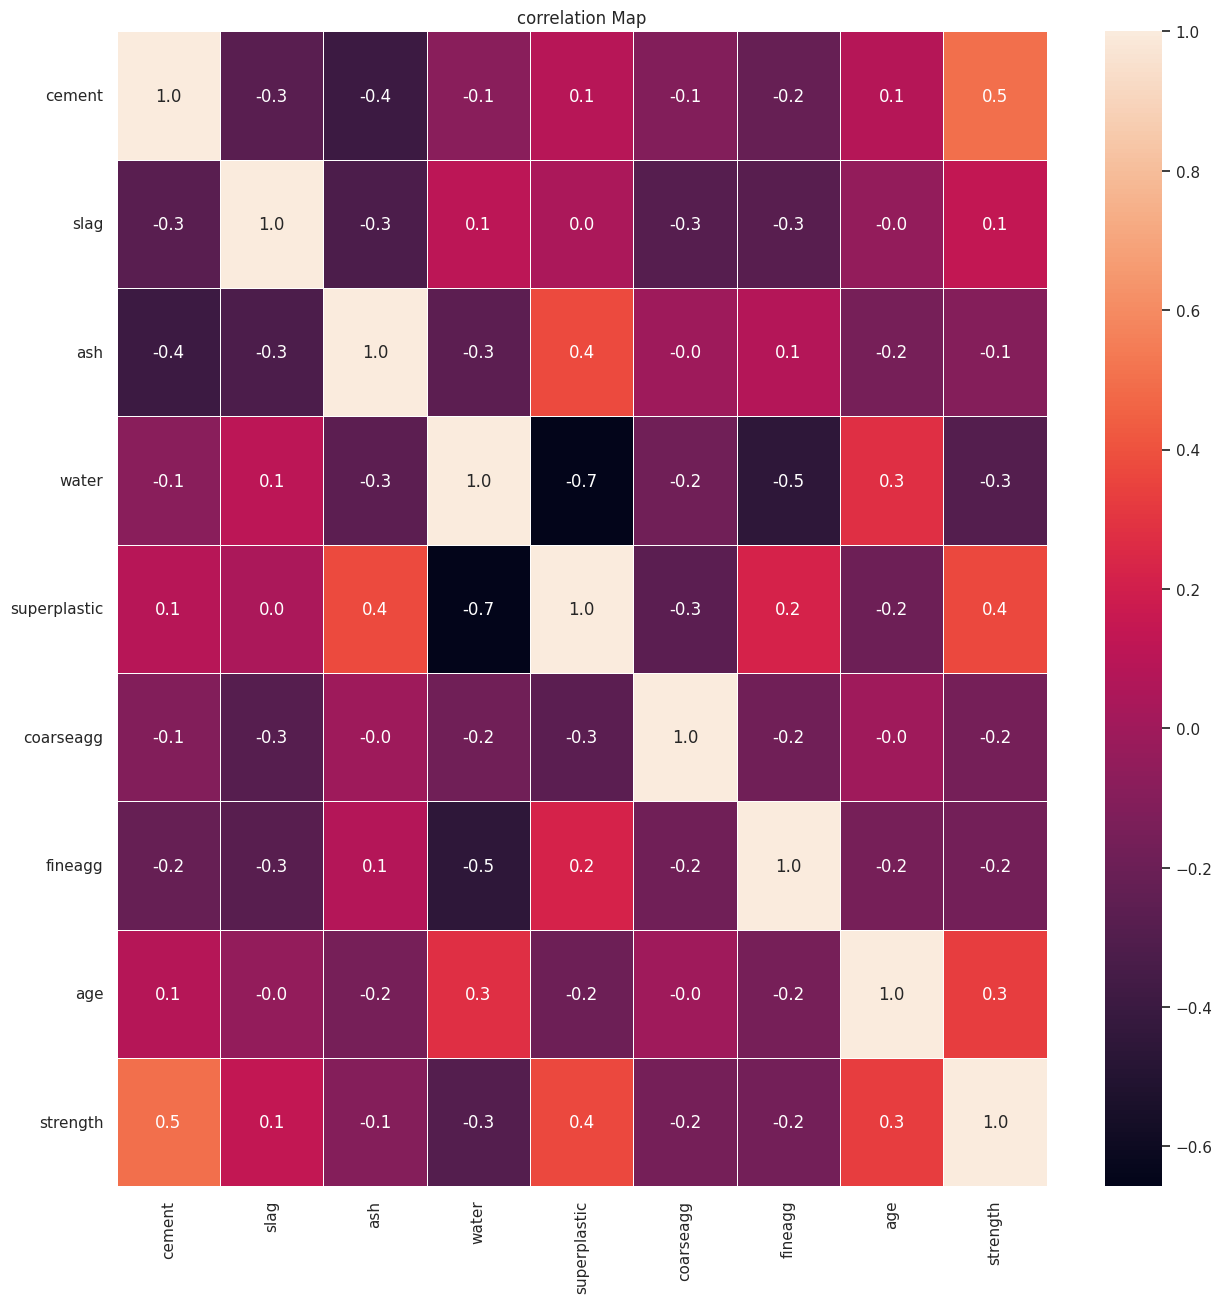

In [ ]:
# Buatlah diagram heatmap dari setiap kolom yang ada dengan library seaborn
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f" ,ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('correlation Map')
plt.savefig('graph.png')
plt.show()

penjelasan code

f, ax = plt.subplots(figsize=(15, 15)): Baris ini membuat gambar (figure) Matplotlib dengan ukuran (figsize) lebar 15 dan tinggi 15. Gambar ini akan digunakan sebagai wadah untuk heatmap yang akan dibuat.

sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax): Ini adalah perintah untuk membuat heatmap dengan Seaborn. data.corr() digunakan untuk menghitung matriks korelasi antara semua pasangan kolom dalam DataFrame data. Parameter annot=True menunjukkan bahwa nilai-nilai dalam sel heatmap akan ditampilkan sebagai label teks. Parameter linewidths=0.5 mengatur lebar garis antara sel heatmap, dan fmt=".1f" mengatur format penulisan angka desimal menjadi satu angka di belakang koma. ax=ax menunjukkan bahwa gambar yang telah dibuat sebelumnya (ax) akan digunakan untuk menggambar heatmap.

plt.xticks(rotation=90): Ini adalah perintah yang memutar label sumbu-x (kolom) pada heatmap sebesar 90 derajat untuk memberikan lebih banyak ruang kepada teks label, sehingga lebih mudah dibaca.

plt.yticks(rotation=0): Ini adalah perintah yang memutar label sumbu-y (baris) pada heatmap menjadi orientasi awal (0 derajat).

plt.title('correlation Map'): Ini adalah perintah untuk menambahkan judul (title) ke heatmap yang akan dibuat. Judulnya adalah "correlation Map" (Peta Korelasi).

plt.savefig('graph.png'): Ini adalah perintah yang digunakan untuk menyimpan heatmap sebagai file gambar dengan nama "graph.png".dapat menyimpan heatmap dalam format gambar yang berbeda (misalnya, PNG) untuk digunakan di luar kode Python.

plt.show(): Ini adalah perintah untuk menampilkan heatmap yang telah dibuat. Hasilnya adalah peta panas yang menunjukkan korelasi antara setiap pasangan kolom dalam DataFrame , dengan label numerik yang menunjukkan tingkat korelasi di antara mereka.

##8. Hitung covariance dari kolom data yang diminta

In [ ]:
# Bandingkan nilai covariance dari data age, strength dan strength dan cement
print("Covariance diantara radius mean dan area mean: ",data.strength.cov(data.age))
print("Covariance diantara radius mean dan fractal dimension se: ",data.strength.cov(data.cement))

Covariance diantara radius mean dan area mean:  347.05975751743136
Covariance diantara radius mean dan fractal dimension se:  869.1430218800419


penjelasan code berikut

print("Covariance diantara radius mean dan area mean: ", data.strength.cov(data.age)): Baris ini menghitung kovarian antara kolom 'strength' dan kolom 'age' dalam DataFrame data menggunakan metode .cov(). Hasilnya adalah nilai kovarian antara kedua kolom tersebut. Ini akan memberikan informasi tentang sejauh mana keduanya bervariasi bersamaan. Jika nilainya positif, itu menunjukkan bahwa ketika 'strength' meningkat, 'age' juga cenderung meningkat (hubungan positif).

print("Covariance diantara radius mean dan fractal dimension se: ", data.strength.cov(data.cement)): Baris ini menghitung kovarian antara kolom 'strength' dan kolom 'cement' dalam DataFrame data. Hasilnya adalah nilai kovarian antara kedua kolom tersebut. Ini akan memberikan informasi tentang sejauh mana keduanya bervariasi bersamaan. Jika nilainya positif, itu menunjukkan bahwa ketika 'strength' meningkat, 'cement' juga cenderung meningkat (hubungan positif).

Kovarian adalah metrik yang berguna untuk memahami sejauh mana dua variabel berubah bersamaan. Namun, nilainya tidak selalu intuitif, dan biasanya disertai dengan korelasi, yang memberikan gambaran yang lebih jelas tentang hubungan antara dua variabel. Kovarian dapat memberikan informasi tentang arah hubungan (positif atau negatif), sementara korelasi memberikan ukuran standar yang mengindikasikan seberapa kuat hubungan tersebut.

9. Hitung pearson correlation dan spearsman correlation dari kolom data yang diminta

In [ ]:
# PEARSON CORRELATION
p1 = data.loc[:,["age","strength"]].corr(method= "pearson")
p2 = data.strength.cov(data.age)/(data.strength.std()*data.age.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ' ,p2)

Pearson correlation: 
               age  strength
age       1.000000  0.328873
strength  0.328873  1.000000
Pearson correlation:  0.32887300077998743


p1 = data.loc[:,["age","strength"]].corr(method= "pearson"): Baris ini menghitung korelasi Pearson antara kolom 'age' dan 'strength' dalam DataFrame data menggunakan fungsi .corr(). Parameter method="pearson" adalah pengaturan default dan tidak perlu ditentukan secara eksplisit karena ini adalah metode korelasi Pearson yang biasanya digunakan. Hasilnya adalah matriks korelasi yang berisi korelasi antara pasangan kolom.

p2 = data.strength.cov(data.age) / (data.strength.std() * data.age.std()): Baris ini juga menghitung korelasi Pearson antara kolom 'age' dan 'strength' secara manual. Pertama, kode ini menghitung kovarian antara kedua kolom menggunakan .cov(). Kemudian, nilai kovarian dibagi dengan produk standar deviasi ('std()') dari kedua kolom. Ini adalah formula korelasi Pearson.

print('Pearson correlation: '): Baris ini mencetak pesan yang menunjukkan bahwa nilai yang akan dicetak adalah korelasi Pearson.

print(p1): Baris ini mencetak matriks korelasi yang dihasilkan oleh perhitungan pertama, yaitu p1. Matriks ini akan berisi korelasi antara 'age' dan 'strength'.

print('Pearson correlation: ', p2): Baris ini mencetak hasil perhitungan korelasi Pearson yang dilakukan secara manual, yaitu p2. Hasilnya adalah korelasi antara 'age' dan 'strength' dengan menggunakan rumus korelasi Pearson.

Korelasi Pearson mengukur seberapa erat hubungan linier antara dua variabel. Nilai korelasi Pearson berkisar antara -1 (hubungan linier negatif sempurna) dan 1 (hubungan linier positif sempurna), dengan 0 menunjukkan tidak ada hubungan linier antara variabel. Nilai positif menunjukkan hubungan positif, sementara nilai negatif menunjukkan hubungan negatif.

##10. Hitung nilai hipotesis testing untuk kolom age dan strength.

In [ ]:
# MENAMPILKAN NILAI HIPOTESIS
statistic, p_value = stats.ttest_rel(data.age,data.strength)
print('HIPOTESIS AGE DAN STRENGHT adalah: ',p_value)

HIPOTESIS AGE DAN STRENGHT adalah:  1.545311719208927e-07


penjelasan code

statistic, p_value = stats.ttest_rel(data.age, data.strength): Baris ini menggunakan modul scipy.stats untuk melakukan uji t-tes berpasangan dengan fungsi ttest_rel(). Argumen pertama adalah data dari kolom 'age', dan argumen kedua adalah data dari kolom 'strength'. Hasil dari uji t-tes adalah dua nilai, yaitu statistic yang adalah nilai statistik t dan p_value yang adalah nilai p. statistic adalah ukuran sejauh mana kedua sampel berbeda satu sama lain, sedangkan p_value adalah probabilitas bahwa perbedaan yang diamati muncul secara acak (nilai p yang rendah menunjukkan perbedaan yang signifikan).

print('HIPOTESIS AGE DAN STRENGHT adalah: ', p_value): Baris ini mencetak pesan yang menyatakan bahwa hipotesis yang diuji adalah antara 'age' dan 'strength'. Kemudian, kode mencetak nilai p-value yang dihasilkan dari uji t-tes berpasangan. Nilai p-value adalah ukuran penting dalam pengujian hipotesis. Nilai p-value yang rendah (biasanya kurang dari 0,05) menunjukkan bahwa perbedaan antara kedua sampel adalah signifikan secara statistik.

Hasil dari kode ini adalah mencetak nilai p-value yang digunakan untuk mengevaluasi hipotesis bahwa tidak ada perbedaan signifikan antara dua sampel 'age' dan 'strength'. Jika nilai p-value cukup rendah, dapat menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan antara kedua sampel ini.